I edited the existing ML Model to create a few visualizations

In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('diab_data.sqlite')

# Query to select data from the database
query = 'SELECT * FROM diabdata';

# Read data into a DataFrame
df = pd.read_sql_query(query, conn)

In [3]:
index = 'index'
df = df.drop(index, axis=1)
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,54.0,0,0,27.32,6.6,80,0
1,Male,28.0,0,0,27.32,5.7,158,0
2,Female,36.0,0,0,23.45,5.0,155,0
3,Female,20.0,0,0,27.32,6.6,85,0
4,Female,44.0,0,0,19.31,6.5,200,1
...,...,...,...,...,...,...,...,...
74389,Female,40.0,0,0,40.69,3.5,155,0
74390,Female,36.0,0,0,24.60,4.8,145,0
74391,Male,66.0,0,0,27.83,5.7,155,0
74392,Female,24.0,0,0,35.42,4.0,100,0


In [4]:
gender_mapping = {'Male': 1, 'Female': 2}
df['gender'] = df['gender'].map(gender_mapping)

In [5]:
# remove rows with NaN values
df = df.dropna()
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2.0,54.0,0,0,27.32,6.6,80,0
1,1.0,28.0,0,0,27.32,5.7,158,0
2,2.0,36.0,0,0,23.45,5.0,155,0
3,2.0,20.0,0,0,27.32,6.6,85,0
4,2.0,44.0,0,0,19.31,6.5,200,1
...,...,...,...,...,...,...,...,...
74389,2.0,40.0,0,0,40.69,3.5,155,0
74390,2.0,36.0,0,0,24.60,4.8,145,0
74391,1.0,66.0,0,0,27.83,5.7,155,0
74392,2.0,24.0,0,0,35.42,4.0,100,0


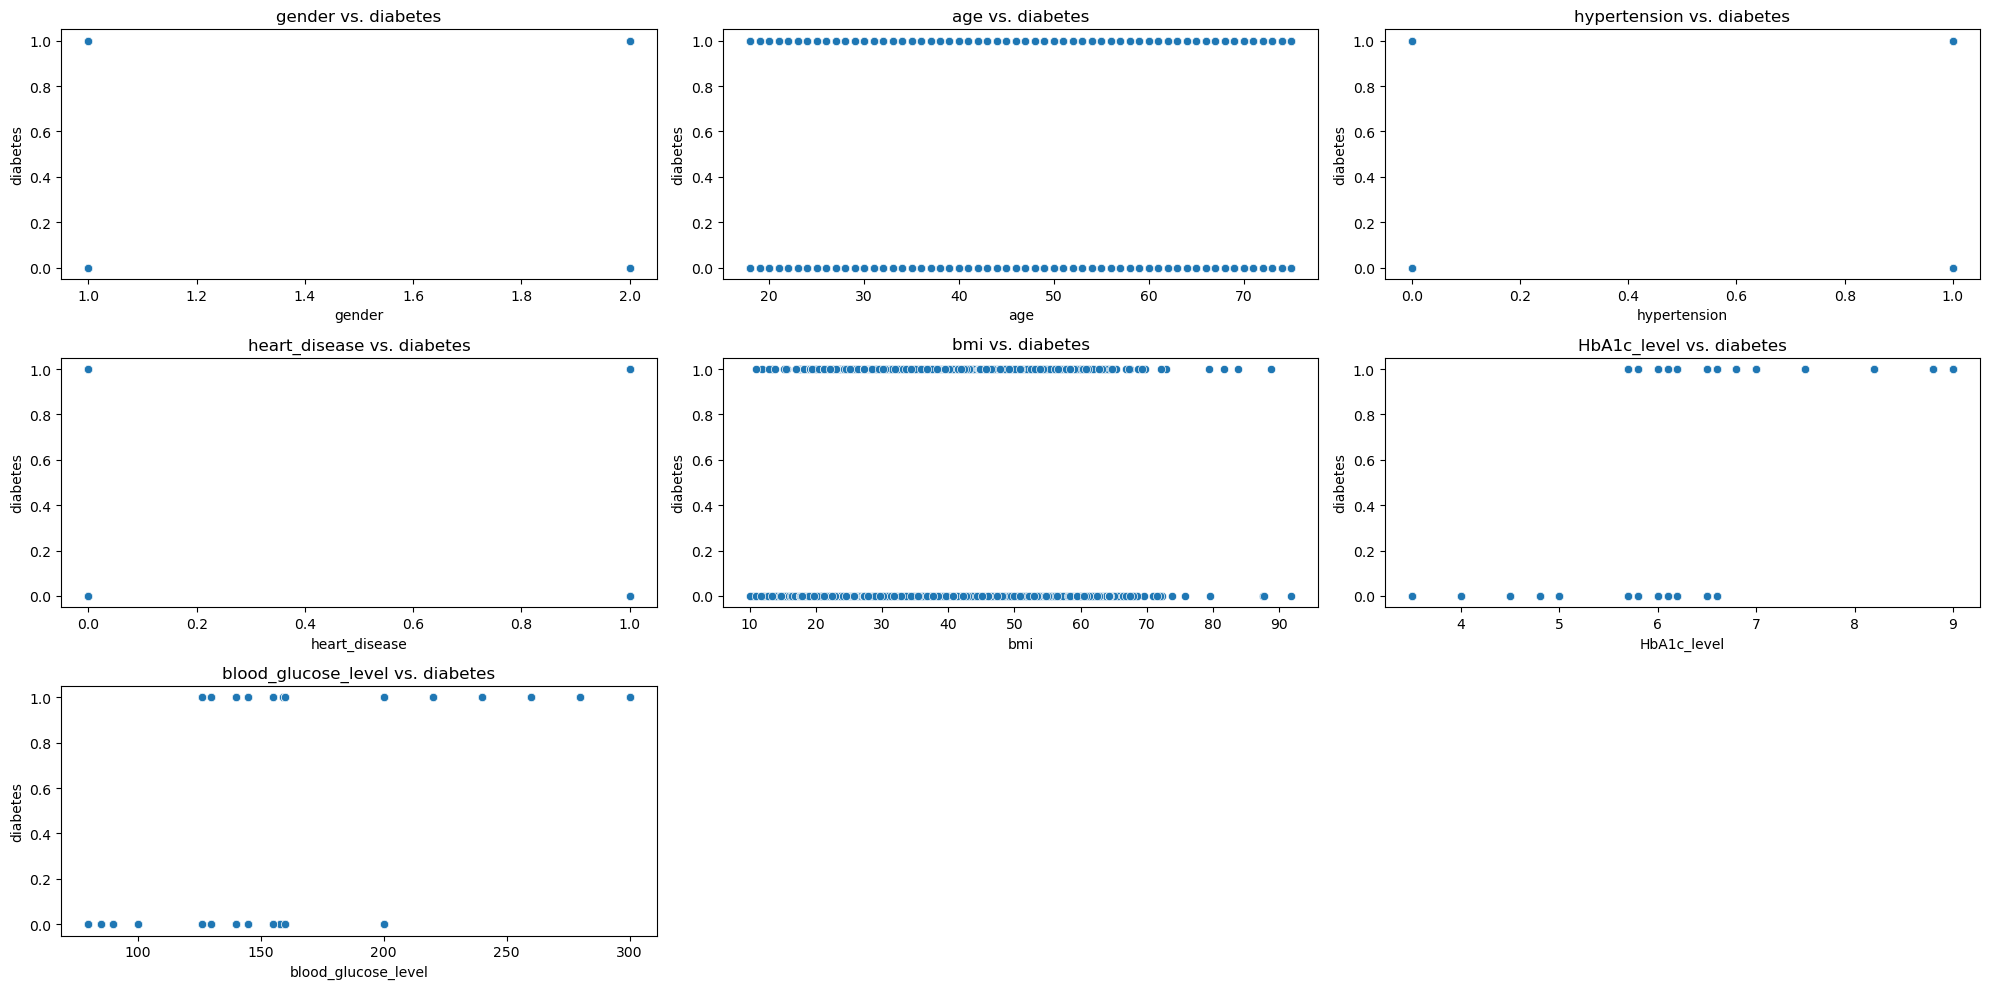

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database and load data
conn = sqlite3.connect('diab_data.sqlite')
query = 'SELECT * FROM diabdata'
df = pd.read_sql_query(query, conn)
conn.close()  

# Drop the 'index' column
df = df.drop('index', axis=1)

# Map gender to numerical values
gender_mapping = {'Male': 1, 'Female': 2}
df['gender'] = df['gender'].map(gender_mapping)

# Remove rows with NaN values
df = df.dropna()


target_variable = 'diabetes'

# List of features (column names) 
features = df.columns.drop(target_variable)

# Setting up the matplotlib figure
plt.figure(figsize=(20, 10))

# Looping through and creating a scatter plot for each feature
for i, feature in enumerate(features):
    plt.subplot(3, (len(features) + 2) // 3, i + 1)  
    sns.scatterplot(x=df[feature], y=df[target_variable])
    plt.title(f'{feature} vs. {target_variable}')

plt.tight_layout()
plt.show()


In [7]:
X = df.drop('diabetes', axis=1) 
y = df['diabetes']  # The target variable

# Splitting Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
print("Before Resampling:")
print("Non-Diabetic count:", sum(y == 0))
print("Diabetic count:", sum(y == 1))


Before Resampling:
Non-Diabetic count: 67548
Diabetic count: 6832


In [9]:
# Undersample the majority class (non-diabetes)
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [10]:
print("After Resampling:")
print("Non-Diabetic count:", sum(y_resampled == 0))
print("Diabetic count:", sum(y_resampled == 1))


After Resampling:
Non-Diabetic count: 6832
Diabetic count: 6832


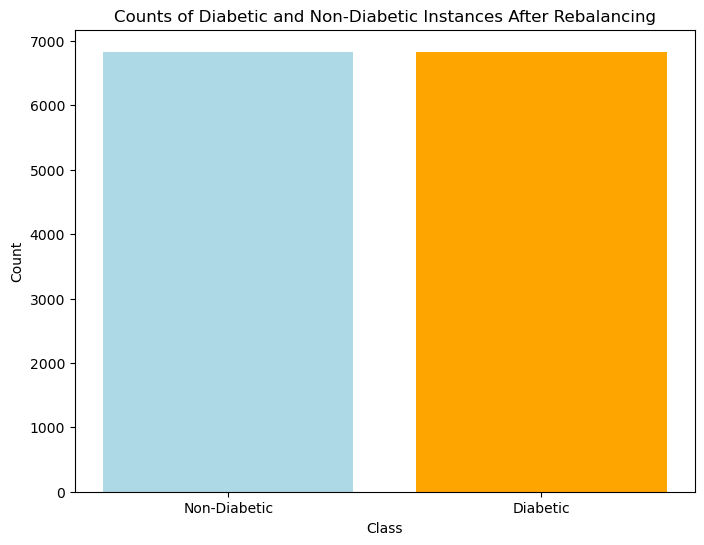

In [11]:
import matplotlib.pyplot as plt

# Count the instances of each class in the rebalanced dataset
diabetic_count = sum(y_resampled == 1)
non_diabetic_count = sum(y_resampled == 0)

# Data for plotting
classes = ['Non-Diabetic', 'Diabetic']
counts = [non_diabetic_count, diabetic_count]

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(classes, counts, color=['#ADD8E6', '#FFA500'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Counts of Diabetic and Non-Diabetic Instances After Rebalancing')
plt.show()


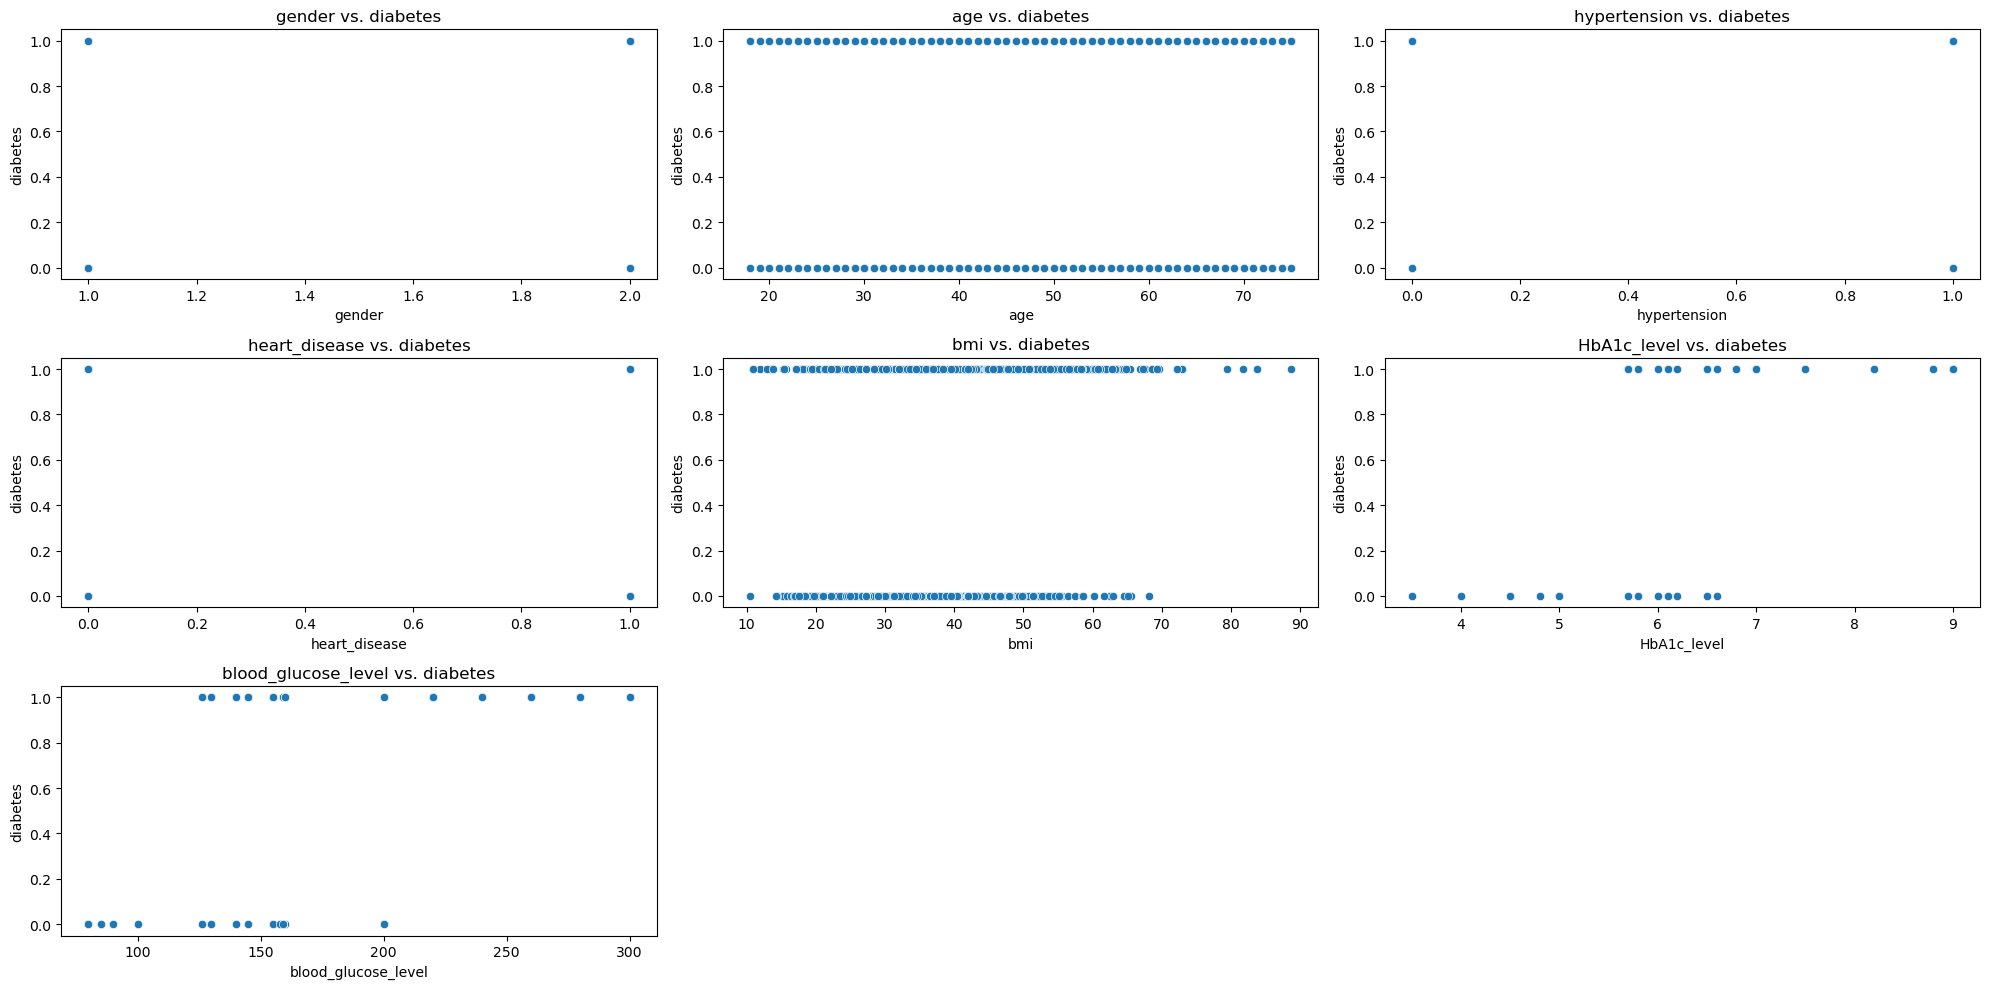

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Convert X_resampled to a DataFrame and concatenate with y_resampled
resampled_df = pd.DataFrame(X_resampled, columns=df.drop(target_variable, axis=1).columns)
resampled_df[target_variable] = y_resampled

# List of features , plot against the target variable
features = resampled_df.columns.drop(target_variable)

# Setting up the matplotlib figure
plt.figure(figsize=(20, 10))

# Looping through and creating a scatter plot for each feature
for i, feature in enumerate(features):
    plt.subplot(3, (len(features) + 2) // 3, i + 1)  # Adjust the grid size based on your number of features
    sns.scatterplot(x=resampled_df[feature], y=resampled_df[target_variable])
    plt.title(f'{feature} vs. {target_variable}')

plt.tight_layout()
plt.show()


#### Logistic Regression 

In [13]:
# Train the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression Model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

# Print evaluation metrics for Logistic Regression Model
print("Logistic Regression Model:")
print(f'Accuracy: {accuracy_logistic}')
print(f'Confusion Matrix:\n{conf_matrix_logistic}')
print(f'Classification Report:\n{classification_report_logistic}')

Logistic Regression Model:
Accuracy: 0.8723015001829492
Confusion Matrix:
[[1206  163]
 [ 186 1178]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1369
           1       0.88      0.86      0.87      1364

    accuracy                           0.87      2733
   macro avg       0.87      0.87      0.87      2733
weighted avg       0.87      0.87      0.87      2733



#### Random Forest 

In [14]:
# Train the Random Forest Model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Make predictions 
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate Random Forest Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Print evaluation metrics for Random Forest Model
print("Random Forest Model:")
print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{classification_report_rf}')


Random Forest Model:
Accuracy: 0.8960848884010245
Confusion Matrix:
[[1225  144]
 [ 140 1224]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1369
           1       0.89      0.90      0.90      1364

    accuracy                           0.90      2733
   macro avg       0.90      0.90      0.90      2733
weighted avg       0.90      0.90      0.90      2733



#### Support Vector Machine 

In [15]:
# Train the Support Vector Machine Model
svm_model = SVC(probability=True)  
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

# Print evaluation metrics for SVM Model
print("Support Vector Machine Model:")
print(f'Accuracy: {accuracy_svm}')
print(f'Confusion Matrix:\n{conf_matrix_svm}')
print(f'Classification Report:\n{classification_report_svm}')

Support Vector Machine Model:
Accuracy: 0.8510793999268204
Confusion Matrix:
[[1138  231]
 [ 176 1188]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1369
           1       0.84      0.87      0.85      1364

    accuracy                           0.85      2733
   macro avg       0.85      0.85      0.85      2733
weighted avg       0.85      0.85      0.85      2733



#### Decision trees 

In [16]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Decision Tree Model:")
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report_str}')

Decision Tree Model:
Accuracy: 0.876326381266008
Confusion Matrix:
[[1196  173]
 [ 165 1199]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1369
           1       0.87      0.88      0.88      1364

    accuracy                           0.88      2733
   macro avg       0.88      0.88      0.88      2733
weighted avg       0.88      0.88      0.88      2733



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import pandas as pd



# Prepare the data
X = df.drop('diabetes', axis=1) 
y = df['diabetes']  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
logistic_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

logistic_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Get predicted probabilities
y_scores_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_scores_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
y_scores_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
y_scores_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate Precision-Recall curve for each model
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, y_scores_logistic)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_scores_dt)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_scores_svm)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)

# Plotting the Precision-Recall curve for all models
plt.figure(figsize=(10, 8))
plt.plot(recall_logistic, precision_logistic, color='blue', lw=2, label='Logistic Regression')
plt.plot(recall_dt, precision_dt, color='green', lw=2, label='Decision Tree')
plt.plot(recall_svm, precision_svm, color='red', lw=2, label='SVM')
plt.plot(recall_rf, precision_rf, color='purple', lw=2, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiple Models')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import pandas as pd



# Prepare the data
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Undersample the majority class (non-diabetes)
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Splitting Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
logistic_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

logistic_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Get predicted probabilities
y_scores_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_scores_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
y_scores_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
y_scores_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and ROC AUC for each model
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_scores_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC curve for all models
plt.figure(figsize=(10, 8))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiple Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [17]:
import pandas as pd

# Create a dictionary to hold the data
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine (SVM)', 'Decision Tree'],
    'Accuracy': ['87.23%', '90.05%', '85.11%', '87.63%'],
    'Precision (Avg)': ['87.5%', '90%', '85.5%', '87.5%'],
    'Recall (Avg)': ['87%', '90%', '85%', '87.5%'],
    'F1-Score (Avg)': ['87.25%', '90%', '85.25%', '87.75%']
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Style the DataFrame
styled_df = df.style\
    .hide(axis="index")\
    .set_table_attributes('style="border-collapse: collapse; border: 1px solid black;"')\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', 'lightblue'), ('border', '1px solid black')]
    },
    {
        'selector': 'td',
        'props': [('border', '1px solid black')]
    }])

# Display the styled DataFrame
styled_df


Model,Accuracy,Precision (Avg),Recall (Avg),F1-Score (Avg)
Logistic Regression,87.23%,87.5%,87%,87.25%
Random Forest,90.05%,90%,90%,90%
Support Vector Machine (SVM),85.11%,85.5%,85%,85.25%
Decision Tree,87.63%,87.5%,87.5%,87.75%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create an empty confusion matrix
confusion_matrix = np.array([[0, 0],
                              [0, 0]])

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot confusion matrix
ax.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

# Add horizontal and vertical lines to split the 4 boxes
ax.axhline(0.5, color='black', linewidth=1)
ax.axvline(0.5, color='black', linewidth=1)

# Display labels for TP, TN, FP, FN in the cells
ax.text(0.25, 0.25, 'True Positives', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.25, 'False Negatives', ha='center', va='center', color='black', fontsize=12)
ax.text(0.25, 0.75, 'False Positives', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.75, 'True Negatives', ha='center', va='center', color='black', fontsize=12)

# Set axis limits 
ax.set_xlim(0, 1)
ax.set_ylim(1, 0)
ax.set_xticks([0.25, 0.75])
ax.set_yticks([0.25, 0.75])
ax.set_xticklabels(['Predicted Positive', 'Predicted Negative'])
ax.set_yticklabels(['Actual Positive', 'Actual Negative'])

plt.title('Confusion Matrix')
plt.show()







In [ ]:
import pandas as pd

# Create a dictionary to hold the data
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Support'],
    'Description': [
        "Precision measures how accurately the model identifies positive cases without making false positive errors.",
        "Recall assesses the model's ability to find all actual positive cases without missing any (minimizing false negatives).",
        "The F1-Score is a balance between precision and recall, providing a holistic measure of model performance.",
        "Support indicates the number of actual occurrences of each class, providing context for the other metrics."
    ],
}

# Create a DataFrame from the dictionary with the description column first
classification_report_df = pd.DataFrame(data)

# Style the DataFrame
styled_df = classification_report_df.style\
    .set_properties(**{'text-align': 'left'}, subset=['Description'])\
    .set_table_attributes('style="border-collapse: collapse; border: 1px solid black;"')\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', 'lightblue'), ('border', '1px solid black'), ('text-align', 'left')]
    },
    {
        'selector': 'td',
        'props': [('border', '1px solid black')]
    }])\
    .hide_index()\
    .format({'Description': lambda x: f'<i>{x}</i>'})

# Display the styled DataFrame
styled_df


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and their corresponding accuracies
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree']
accuracies = [87.23, 90.05, 85.11, 87.63]

# Sort  in descending order of accuracy
models_sorted = [x for _, x in sorted(zip(accuracies, models), reverse=True)]
accuracies_sorted = sorted(accuracies, reverse=True)

# Define colors 
colors = plt.cm.Blues(np.linspace(0.8, 0.2, len(models_sorted)))

# Create a bar chart to represent the rankings
plt.figure(figsize=(8, 6))
bars = plt.barh(models_sorted, accuracies_sorted, color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Rankings (Descending Order)')
plt.gca().invert_yaxis()  
plt.xlim(0, 100)  
plt.grid(axis='x', linestyle='--', alpha=0.6)


for i, acc in enumerate(accuracies_sorted):
    plt.text(acc + 1, i, f'{acc:.2f}%', va='center')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create an empty confusion matrix
confusion_matrix = np.array([[0, 0],
                              [0, 0]])

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4.5)) 

# Plot confusion matrix
ax.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

# Add horizontal and vertical lines to split the 4 boxes
ax.axhline(0.5, color='black', linewidth=1)
ax.axvline(0.5, color='black', linewidth=1)

# Display labels for TP, TN, FP, FN in the cells
ax.text(0.25, 0.25, 'True Positives\n(1206)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.25, 'False Negatives\n(163)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.25, 0.75, 'False Positives\n(186)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.75, 'True Negatives\n(1178)', ha='center', va='center', color='black', fontsize=12)

# Set axis limits
ax.set_xlim(0, 1)
ax.set_ylim(1, 0) 
ax.set_xticks([0.25, 0.75])
ax.set_yticks([0.25, 0.75])
ax.set_xticklabels(['Predicted Diabetic', 'Predicted Non-Diabetic'])
ax.set_yticklabels(['Actual Diabetic', 'Actual Non-Diabetic'])

plt.title('Confusion Matrix for Logistic Regression Model')
fig.tight_layout()  
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create an empty confusion matrix
confusion_matrix = np.array([[0, 0],
                              [0, 0]])

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4.5)) 

# Plot confusion matrix
ax.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

# Add horizontal and vertical lines to split the 4 boxes
ax.axhline(0.5, color='black', linewidth=1)
ax.axvline(0.5, color='black', linewidth=1)

# Display labels for TP, TN, FP, FN in the cells
ax.text(0.25, 0.25, 'True Positives\n(1230)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.25, 'False Negatives\n(139)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.25, 0.75, 'False Positives\n(133)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.75, 'True Negatives\n(1231)', ha='center', va='center', color='black', fontsize=12)

# Set axis limits 
ax.set_xlim(0, 1)
ax.set_ylim(1, 0)  
ax.set_xticks([0.25, 0.75])
ax.set_yticks([0.25, 0.75])
ax.set_xticklabels(['Predicted Diabetic', 'Predicted Non-Diabetic'])
ax.set_yticklabels(['Actual Diabetic', 'Actual Non-Diabetic'])

plt.title('Confusion Matrix for Random Forest Model')
fig.tight_layout()  
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create an empty confusion matrix
confusion_matrix = np.array([[0, 0],
                              [0, 0]])

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4.5))

# Plot confusion matrix
ax.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

# Add horizontal and vertical lines to split the 4 boxes
ax.axhline(0.5, color='black', linewidth=1)
ax.axvline(0.5, color='black', linewidth=1)

# Display labels for TP, TN, FP, FN in the cells
ax.text(0.25, 0.25, 'True Positives\n(1138)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.25, 'False Negatives\n(231)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.25, 0.75, 'False Positives\n(176)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.75, 'True Negatives\n(1188)', ha='center', va='center', color='black', fontsize=12)

# Set axis limits
ax.set_xlim(0, 1)
ax.set_ylim(1, 0)  
ax.set_xticks([0.25, 0.75])
ax.set_yticks([0.25, 0.75])
ax.set_xticklabels(['Predicted Diabetic', 'Predicted Non-Diabetic'])
ax.set_yticklabels(['Actual Diabetic', 'Actual Non-Diabetic'])

plt.title('Confusion Matrix for SVM Model')
fig.tight_layout()  
plt.show()


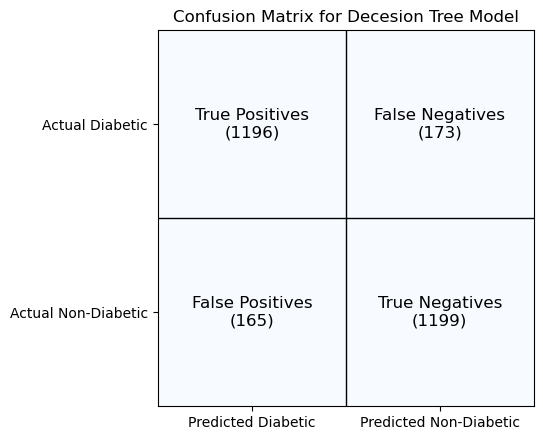

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create an empty confusion matrix
confusion_matrix = np.array([[0, 0],
                              [0, 0]])

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4.5))  

# Plot confusion matrix
ax.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

# Add horizontal and vertical lines to split the 4 boxes
ax.axhline(0.5, color='black', linewidth=1)
ax.axvline(0.5, color='black', linewidth=1)

# Display labels for TP, TN, FP, FN in the cells
ax.text(0.25, 0.25, 'True Positives\n(1196)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.25, 'False Negatives\n(173)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.25, 0.75, 'False Positives\n(165)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.75, 'True Negatives\n(1199)', ha='center', va='center', color='black', fontsize=12)

# Set axis limits
ax.set_xlim(0, 1)
ax.set_ylim(1, 0)  
ax.set_xticks([0.25, 0.75])
ax.set_yticks([0.25, 0.75])
ax.set_xticklabels(['Predicted Diabetic', 'Predicted Non-Diabetic'])
ax.set_yticklabels(['Actual Diabetic', 'Actual Non-Diabetic'])

plt.title('Confusion Matrix for Decesion Tree Model')
fig.tight_layout()  
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np


# Splitting the rebalanced data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the models
logistic_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

logistic_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Get predicted probabilities
y_scores_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_scores_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
y_scores_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
y_scores_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Printing probabilities (optional, for verification)
print("Logistic Regression Predicted Probabilities:\n", y_scores_logistic)
print("Decision Tree Predicted Probabilities:\n", y_scores_dt)
print("SVM Predicted Probabilities:\n", y_scores_svm)
print("Random Forest Predicted Probabilities:\n", y_scores_rf)


Logistic Regression Predicted Probabilities:
 [0.14807649 0.2720604  0.99402514 ... 0.9651598  0.91338418 0.21607945]
Decision Tree Predicted Probabilities:
 [1. 0. 1. ... 1. 1. 0.]
SVM Predicted Probabilities:
 [0.06732795 0.28361453 0.99370283 ... 0.97965166 0.96247492 0.06995767]
Random Forest Predicted Probabilities:
 [0.13 0.37 0.96 ... 1.   0.65 0.03]


In [19]:
import numpy as np

def log_odds(probabilities):
    """ Convert probabilities to log-odds. """
    odds = probabilities / (1 - probabilities)
    log_odds = np.log(odds)
    return log_odds

# Using the function on the predicted probabilities from your models
# Replace 'y_scores_logistic' with the actual variable holding your model's probabilities
log_odds_values_logistic = log_odds(y_scores_logistic)
print("Logistic Regression Log-Odds Values:\n", log_odds_values_logistic)

# Repeat for other models as needed
# log_odds_values_dt = log_odds(y_scores_dt)
# log_odds_values_svm = log_odds(y_scores_svm)
# log_odds_values_rf = log_odds(y_scores_rf)


Logistic Regression Log-Odds Values:
 [-1.7497678  -0.98419398  5.11420197 ...  3.3215219   2.35567414
 -1.28866151]


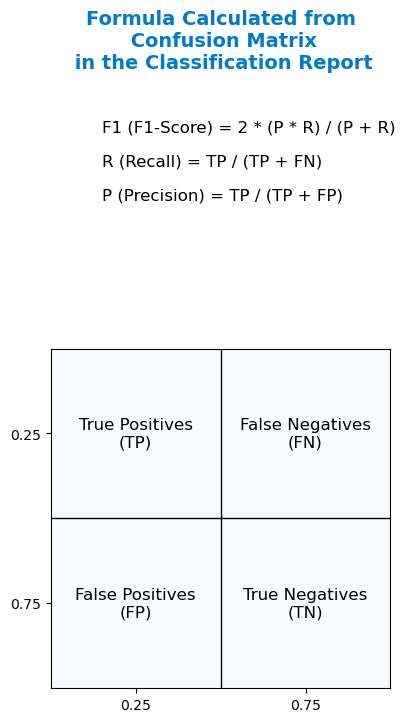

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Create an empty confusion matrix
#confusion_matrix = np.array([[0, 0],
                             # [0, 0]])

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Plot confusion matrix
ax.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')

# Add horizontal and vertical lines to split the 4 boxes
ax.axhline(0.5, color='black', linewidth=1)
ax.axvline(0.5, color='black', linewidth=1)

# Display labels for TP, TN, FP, FN in the cells
ax.text(0.25, 0.25, 'True Positives\n(TP)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.25, 'False Negatives\n(FN)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.25, 0.75, 'False Positives\n(FP)', ha='center', va='center', color='black', fontsize=12)
ax.text(0.75, 0.75, 'True Negatives\n(TN)', ha='center', va='center', color='black', fontsize=12)

# Set axis limits
ax.set_xlim(0, 1)
ax.set_ylim(1, 0)  
ax.set_xticks([0.25, 0.75])
ax.set_yticks([0.25, 0.75])



# Add key feature boxes
rect_precision = plt.Rectangle((0.1, -0.2), 0.3, 0.15, fill=False, edgecolor='black', lw=1, label='Precision (P)')
rect_recall = plt.Rectangle((0.4, -0.2), 0.3, 0.15, fill=False, edgecolor='black', lw=1, label='Recall (R)')
rect_f1 = plt.Rectangle((0.7, -0.2), 0.3, 0.15, fill=False, edgecolor='black', lw=1, label='F1-Score (F1)')
ax.add_patch(rect_precision)
ax.add_patch(rect_recall)
ax.add_patch(rect_f1)

# Add calculation formulas below the matrix

ax.text(0.15, -0.45, 'P (Precision) = TP / (TP + FP)', ha='left', va='center', color='black', fontsize=12)
ax.text(0.15, -0.55, 'R (Recall) = TP / (TP + FN)', ha='left', va='center', color='black', fontsize=12)
ax.text(0.15, -0.65, 'F1 (F1-Score) = 2 * (P * R) / (P + R)', ha='left', va='center', color='black', fontsize=12)

# Add light blue and bold title
plt.title('Formula Calculated from\n Confusion Matrix\n in the Classification Report', fontsize=14, y=1.8, color='#007ACC', fontweight='bold')  

fig.tight_layout()  
plt.show()
